In [88]:
# Initialize Otter
import otter
grader = otter.Notebook()

## **Assignment Instructions**


* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...` where prompted
* **Ignore the last cell**
* **How to run this on google colab**: Uncomment the below code and replace wherever necessary to run this assignment on google colab (only if you want to - jupyter notebooks work just fine)

In [89]:
#Linking google colab to your drive folder
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

#Replace 'Assignment 4 DS' with the path of the folder of your assignment
#%cd /content/gdrive/My\ Drive/Assignment 4 DS

## **Submission Instructions**

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_1.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the ZIP file must be your `Roll Number`

## Grading

Grading is broken down into autograded answers and free response.

* For autograded answers, the results of your code are compared to provided and/or hidden tests.
* There are default assignments in some questions, storing the state of the dataframes at the time of that particular question in '*#_q#*' variables. Do NOT change any of these assignments as they are used by the auto-grader to check your answers.
* For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

* **Note that for ALL plotting questions from here on out, we will expect appropriate titles, axis labels, legends, etc. The following question serves as a good guideline on what is "enough": If I directly downloaded the plot and viewed it, would I be able to tell what was being visualized without knowing the question?**

## Introduction

You decide to buy a home but you are currently facing a paradox of choice - there are just too many ways of customizing it and so many options available! Do you want it to be in a busy town? In a forest? Do you want to have a basement? Or perhaps 3 stories instead? Or both? Or maybe you want a large parking area...

The choices are endless, unlike your budget (unfortunately). Therefore, you decide to build a regression model which can take all such factors as input and perhaps give you some clue of just how much can you aim for - yes you do have real estate agencies for this kind of stuff but having learned what regression can do, you feel very powerful at the moment and so decide to take it into your own hands. 

To build such a model, you need a dataset on which this model can be trained. Luckily, there is a dataset available which can help you in answering some of your wishes.

The dataset consists of information regarding home prices, along with the information of a number of other factors. The target variable is price and your task is to build a multiple linear regression model to help you predict prices and find the perfect future home for your budget.

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
df_data = pd.read_csv('data.csv')

In [92]:
df_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## **Data Cleaning & Pre-processing**

**Question 1:** We will first examine our dataset using the shape and and summary function, also observing whether the dataset requires cleaning. Use the cell below to check if the dataset requires any. If so, feel free to do so.

*Answering Guidelines:* Store your final dataset in the ```df_q1``` variable and the output of the functions in the appropriate variables after cleaning (if applicable).

<!--
BEGIN QUESTION
name: q1
points: 2
-->

In [93]:
df_shape = df_data.shape
df_summary = df_data.describe()
df_q1 = df_data.dropna()

In [94]:
grader.check("q1")

q1 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2:** Use your understanding of data visualization to draw a suitable graph that will detect if any variable
has outliers. Please remove the outliers from each variables if detected

*Answering guidelines:* Follow the instructions given in the 'Grading' section with regards to plots. Make sure to draw boxplots for each variable. To understand what an outlier is, please read this: https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

<!--
BEGIN QUESTION
name: q2
points: 5
manual: true
-->

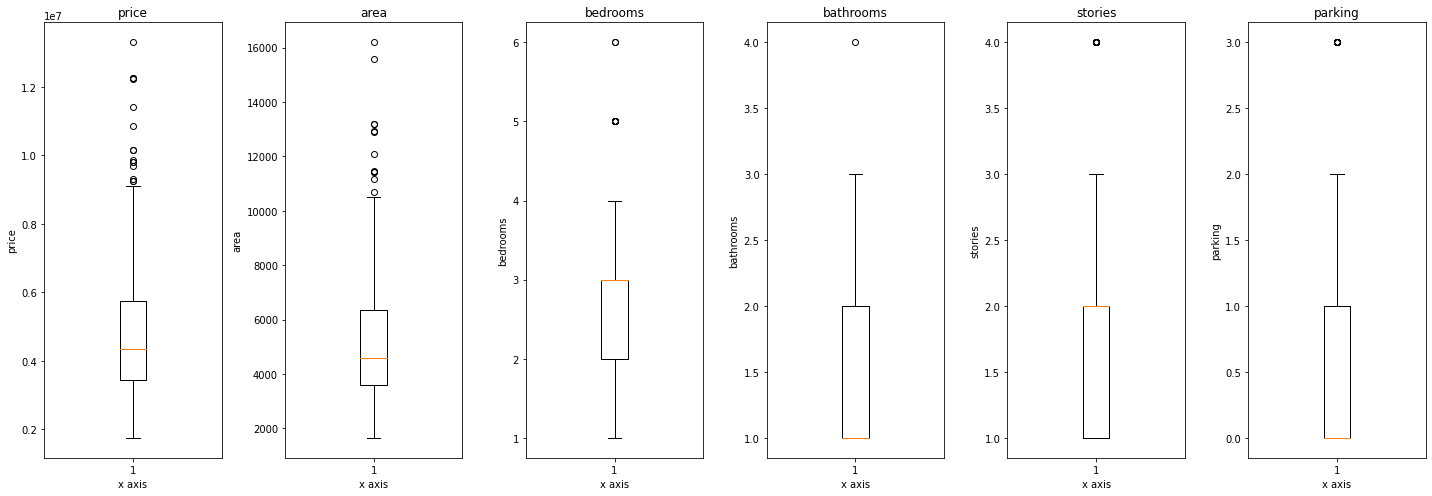

In [95]:
%matplotlib inline
plt.figure(figsize=(20,7))

columns_list = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

for i in range(len(columns_list)):
    
    plt.subplot(1,6,i+1)
    plt.boxplot(df_data[columns_list[i]])                       #creates boxplot for price
    plt.title(columns_list[i])                                  #sets the title 
    plt.xlabel('x axis')                                        #sets x-axis label
    plt.ylabel(columns_list[i])                                 #sets y-axis label
    
plt.tight_layout()
plt.show()

Removing Outliers

In [96]:
df_data_no_outlier = df_data
#after eyeballing outliers from boxplot removing them.
df_data_no_outlier = df_data_no_outlier[ (df_data_no_outlier['price'] < 0.89*10**7) ]
df_data_no_outlier = df_data_no_outlier[ (df_data_no_outlier['area'] < 9800) ]
df_data_no_outlier = df_data_no_outlier[ (df_data_no_outlier['bedrooms'] < 5) ]
df_data_no_outlier = df_data_no_outlier[ (df_data_no_outlier['bathrooms'] < 4) ]
df_data_no_outlier = df_data_no_outlier[ (df_data_no_outlier['stories'] < 4) ]
df_data_no_outlier = df_data_no_outlier[ (df_data_no_outlier['parking'] < 3) ]
df_data = df_data_no_outlier

## Simple Linear Regression

<!-- END QUESTION -->

**Question 3:** To build a linear regression model, you need to make sure that all of your data is numeric. Therefore, apart from the ```furnishingstatus``` column, convert all qualitative columns to a one-hot encoding. The ```furnishingstatus``` column has three classes, all of which would need to be converted into a one-hot encoding. Use ```.get_dummies``` function in the pandas library to convert variables like ```furnishingstatus``` based on the different categories present. 

*Answering Guidelines:* Make sure ```df_data``` stores the final dataframe for it to be stored in ```df_q3```. Otherwise, simply assign the dataframe with encodings to the variable.

<!--
BEGIN QUESTION
name: q3
points: 3
-->

In [97]:
df_data.replace(to_replace="yes", value=1, inplace=True)
df_data.replace(to_replace="no", value=0, inplace=True)
df_data = pd.get_dummies(df_data)
df_q3 = df_data.copy()

In [98]:
grader.check("q3")

q3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 4:** We can choose to drop any feature from the dataset which we think is not important. Devise a method which will help you figure out a way to see which features should be dropped and explain why. Explain your method properly. Name the features which should be removed. (Don't remove any feature from the dataset).

*Answering Guidelines:* Follow the instructions given in the 'Grading' section with regards to plots.

<!--
BEGIN QUESTION
name: q4
points: 2
manual: true
-->

From a correlation matrix we can observe which of the features have a very low correlation with the predicting variable i-e price. It is reasonable to
remove such variables with low correlation with price because this means that whatever the value of this variable will be, the price will not be affected
by it. Since, the features hotwaterheating and furnishingstatus_semi-furnished have very low correlation with price so it may be appropriate to remove them.

In [99]:
corr_data = df_data.corr(method='pearson')
corr_data.style.background_gradient(cmap='YlGnBu').set_precision(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
price,1.000,0.521,0.325,0.410,0.239,0.295,0.330,0.282,0.093,0.418,0.317,0.346,0.193,0.150,-0.327
area,0.521,1.000,0.106,0.105,-0.077,0.274,0.238,0.108,-0.014,0.253,0.281,0.211,0.120,0.018,-0.125
bedrooms,0.325,0.106,1.000,0.328,0.466,-0.017,0.058,0.129,0.016,0.160,0.089,0.136,0.036,0.104,-0.141
bathrooms,0.410,0.105,0.328,1.000,0.194,-0.003,0.152,0.181,0.041,0.121,0.109,0.056,0.063,0.068,-0.127
stories,0.239,-0.077,0.466,0.194,1.000,0.070,-0.026,-0.090,0.079,0.145,-0.069,0.065,0.049,0.075,-0.121
mainroad,0.295,0.274,-0.017,-0.003,0.070,1.000,0.086,0.082,0.007,0.077,0.178,0.203,0.127,0.009,-0.122
guestroom,0.330,0.238,0.058,0.152,-0.026,0.086,1.000,0.415,-0.011,0.109,0.067,0.202,0.086,0.018,-0.095
basement,0.282,0.108,0.129,0.181,-0.090,0.082,0.415,1.000,-0.051,0.078,0.073,0.244,0.073,0.050,-0.117
hotwaterheating,0.093,-0.014,0.016,0.041,0.079,0.007,-0.011,-0.051,1.000,-0.106,0.077,-0.036,-0.016,0.099,-0.089
airconditioning,0.418,0.253,0.160,0.121,0.145,0.077,0.109,0.078,-0.106,1.000,0.122,0.100,0.126,-0.015,-0.097


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5:** Provide a rationale, keeping the box plots and the correlation diagram in mind, in the markdown cell below for why or why not you choose to drop any feature.

*Answering Guidelines:* There is no right or wrong answer to this question - the purpose is to, both, make you look closely at your data and check how strongly you can form a rationale in choosing features. Feel free to come back to this question after having made models - the process of choosing features is usually iterative. A placeholder for your answer has been made.

<!--
BEGIN QUESTION
name: q5
points: 1
manual: true
-->

 Since, the features hotwaterheating have very low correlation with price so it may be appropriate to remove them because whatever the values of these values is, the price variable will be not affected. While remaining features have reasonable correlation so no need to remove them.

**Question 6:** It is time for you to split the dataset into features and a response variable. 

*Answering Guidelines:* ```X``` should store all your feature columns and ```y``` should have the response variable. 

<!--
BEGIN QUESTION
name: q6
points: 2
-->

In [100]:
X = df_data.drop(columns=['price'])
y = df_data[['price']]

#The dataframes need to be converted into numpy for our implementation
X = X.to_numpy()
y = y.to_numpy()

**Question 7:** Before any model can be trained, it is important for your data to be split into different sets and be standardized.

You will run into many problems such as exploding weights, division by zero etc. Use ```StandardScaler``` (it has already been imported for you) from sklearn to help you in this. Read up on how and why it is used.

You will be implementing the most basic split: the 'Train-Test' split (here is a comprehensive article explaining the need of such splits: https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). Refer to lecture 22 for more details.

*Answering guidelines:* Use the train_test_split function imported from sklearn above. Read up on how it is used and use it to make a 70-30 train-test split. Use standardized ```X``` and ```y``` as your data to be input. Do not change the variables already coined for you below.

<!--
BEGIN QUESTION
name: q7
points: 2
-->

In [101]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

scalar = StandardScaler()
y = scalar.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
grader.check("q7")

q7 results: All test cases passed!

Now that you have split the data, it is time you build the model so that the model can be trained on that data.

In this part, you will be implementing the model yourself (with the guide of placeholders). While this approach is seldom used, it is important to understand the basics of the mechanics behind these models for you to understand why a model might not be working as well as you would want it to.

**Note: Your solution has to be efficient**. Using simple for loops to iterate over all data-points will not earn you full marks, you should try to use vectorized versions of the equations. You have covered these in class as well. Make sure you deal with exploding weights or division by zeros. This can be done by changing the learning rates and using the right algorithms when calculating the derivatives. If you get an "overflow" error, try to **reduce the learning rate and double check your loss derivative** (though derivatives will be given to you in the form of placeholders but this is something that you should be aware of).

**Question 8:** Complete the function below to calculate predicted obseration(s), given certain parameters of the model (theta) and X.

<!--
BEGIN QUESTION
name: q8
points: 1
-->

In [103]:
def predict(theta, X):
    h = np.dot(X,theta)
    return h 

In [104]:
grader.check("q8")

q8 results: All test cases passed!

**Question 9:** Complete the functions below to be able to compute the squared loss and absolute loss. 

*Answering Guidelines:* Make sure to return the correct value. Feel free to introduce as many variables as you want.

<!--
BEGIN QUESTION
name: q9
points: 2
-->

In [105]:
def squared_loss(y, yhat):
    return  np.mean((y - yhat)**2)

def abs_loss(y, yhat):
    return  np.mean(abs(y - yhat))

In [106]:
grader.check("q9")

q9 results: All test cases passed!

**Question 10:** Complete the function below to compute mean squared loss and the absolute squared loss. 

*Answering Guidelines:* The following are the parameters being sent in:
* X: the features of the data
* theta: model parameters
* y: the observed response variable
* loss_func: defines what function needs to be computed - 'L2' or 'L1'. This parameter has been kept for future purposes. 

 In the case where wrong input has been entered for ```loss_func```, make the function return 0.

<!--
BEGIN QUESTION
name: q10
points: 2
-->

In [107]:
def compute_cost(X, theta, y, loss_func):
    yhat = predict(theta, X)
    cost = 0
    
    if loss_func == "L2":
        cost = squared_loss(y, yhat) 
    elif loss_func == "L1":
        cost = abs_loss(y, yhat)
        
    return cost

#For testing purposes
theta_12 = np.array([1, 2, 3])
X_12 = np.array([[4, 5, 6]])
y_12 = np.array([10])
cost_12 = compute_cost(X_12, theta_12, y_12, "L3")
cost_12s = compute_cost(X_12, theta_12, y_12, "L2")
cost_12a = compute_cost(X_12, theta_12, y_12, "L1")

In [108]:
grader.check("q10")

q10 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 11:** How would you reason the use of MSE vs. MAE? 

*Answering Guidelines:* Briefly discuss the strenghts and weaknesses of the two.

<!--
BEGIN QUESTION
name: q11
points: 2
manual: true
-->

1) Since, the errors are squared in MSE therefore, MSE penalises the large error much more significantly which means that MSE can be sensitive to large errors and outliers but on the other hand, it is also beneficial in situations where it is very important to avoid large errors. 

2) Secondly, MSE is also differentiable while MAE is not, so MSE is mostly used to do gradient descent

3) However, MAE is much more robust and insensitive to outliers

<!-- END QUESTION -->

**Question 12:** In class, you have extensively studied the maths behind minimizing the loss functions to get to the optimal parameters of the model, specifically **lecture**. Gradient Descent is an algorithm that does precisely that - optimizes parameters in order to get to the local minimum of the cost function by continuously tweaking the parameters of the model (guided through learning rate).



*Answering Guidelines:* The following are the parameters being sent in:
* X: the features of the data
* theta: model parameters
* y: the observed response variable
* loss_func: defines what function needs to be computed - 'L2' or 'L1'. This parameter has been kept for future purposes. 
* alpha: learning rate
* iter_num: number of iterations that your model will run for
* steps: after how many steps you would want to save the cost (to plot the learning curve). You need not worry about this since this is just for visualization purposes. If you are unsure, simply leave it as 1.


<!--
BEGIN QUESTION
name: q12
points: 3
-->

In [109]:
def gradient_descent(X, y, theta, alpha, iter_num, loss_func, steps):
    history = [] #cost history
    m = len(X) #number of samples of the data 
    
    for iteration in range(iter_num):
            
        cost = compute_cost(X, theta, y, loss_func)
        history.append(cost)
        
        y_hat = predict(theta, X)
        difference = (y - y_hat)
        
        if loss_func == "L1":
            gradient = np.dot(X.T, np.sign(difference))
            theta = theta - ( (-1/m)*(alpha)*gradient )
            
        elif loss_func == "L2":
            gradient = np.dot(X.T, difference)
            theta = theta - ( (-2/m)*(alpha)*gradient )
            
    return history, theta

#For testing purposes
theta_14 = np.array([1, 2, 3])
X_14 = np.array([[4, 5, 6], [4, 5, 6]])
y_14 = np.array([10, 11])
history, theta_opt = gradient_descent(X_14, y_14, theta_14, 0.01, 1, "L1", 1)

In [110]:
grader.check("q12")

q12 results: All test cases passed!

**Question 13:** Add the bias terms to ```X_train``` and ```X_test```

<!--
BEGIN QUESTION
name: q13
points: 2
-->

In [111]:
X_train = np.c_[ np.ones(X_train.shape[0]), X_train ]
X_test = np.c_[ np.ones(X_test.shape[0]), X_test ]

In [112]:
grader.check("q13")

q13 results: All test cases passed!

### Running Model

**Question 14:** Now that the methods have been written, we will put it altogether and run a multiple linear regression model on our data. 

*Answering Guidelines:* The placeholders have been made. Simply call the appropriate functions and methods. Feel free to add more variables but make sure the mentioned variables store the final answers.  

<!--
BEGIN QUESTION
name: q14
points: 4
-->

In [113]:
#Initialize the parametrs to zero
theta = np.zeros((X_train.shape[1], 1))

#Initialize parameters
iter_num = 10000
alpha = 0.001
loss_func = "L1" 
steps = 1

cost_history, theta = gradient_descent(X_train, y_train, theta, alpha, iter_num, loss_func, steps)

The following code cell plots cost_history against the number of iterations to get an idea of how the cost is progressing and so to get an idea of how your model is performing. 

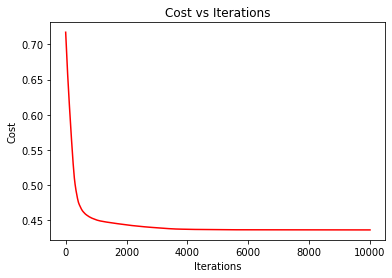

In [114]:
fig, ax = plt.subplots()
ax.plot(np.arange(iter_num), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Cost vs Iterations')
plt.show()

## Evaluating the Model

**Question 15:** Run predictions on y_train and y_test. We will be using these in the next questions.

*Answering Guidelines:* Use the formula implemented previously. Record the answer for the last variable as True or False. 

<!--
BEGIN QUESTION
name: q15
points: 2
-->

In [115]:
yhat_test = predict(theta, X_test)
yhat_train = predict(theta, X_train)
are_you_having_fun = True

In [116]:
theta.shape

(15, 1)

In [117]:
grader.check("q15")

q15 results: All test cases passed!

### Residuals

**Question 16:** Calculate residuals for the above predictions.

*Answering Guidelines:* To read up on why residuals are needed, the following article is a good read as well: https://blog.minitab.com/blog/adventures-in-statistics-2/why-you-need-to-check-your-residual-plots-for-regression-analysis

<!--
BEGIN QUESTION
name: q16
points: 2
-->

In [118]:
train_residuals = y_train - yhat_train
test_residuals = y_test - yhat_test

In [119]:
print(len(train_residuals))

317


<!-- BEGIN QUESTION -->

**Question 17:** Plot the residual plots for, both, the train and test data.

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots.

<!--
BEGIN QUESTION
name: q17
points: 2
manual: true
-->

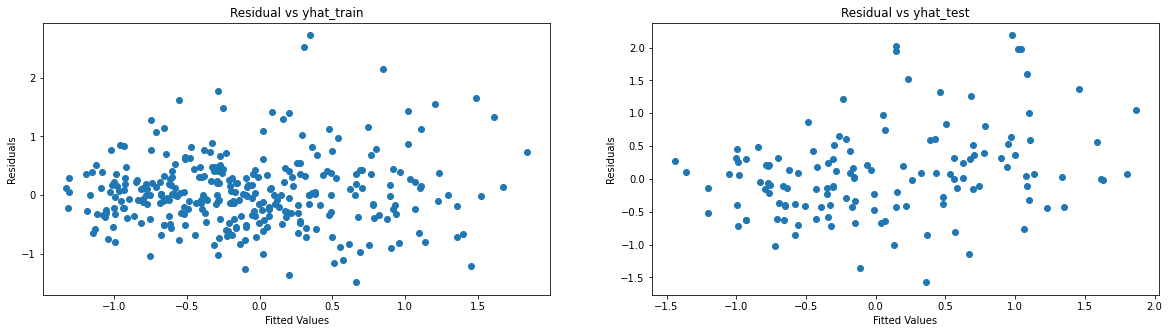

In [120]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title("Residual vs yhat_train")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.scatter(yhat_train, train_residuals)

plt.subplot(1,2,2)
plt.title("Residual vs yhat_test")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.scatter(yhat_test, test_residuals)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 18:** Make use of histograms to see the distribution of the residuals. 

*Answering Guidelines*: Follow the instructions given in the 'Grading' section with regards to plots.

<!--
BEGIN QUESTION
name: q18
points: 2
manual: true
-->

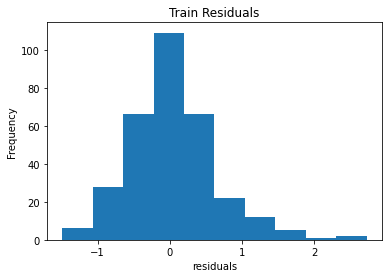

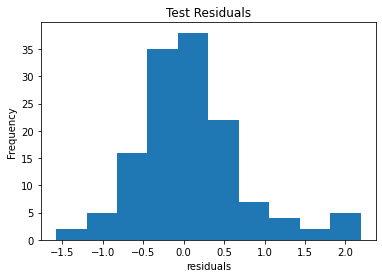

In [121]:
plt.title("Train Residuals")
plt.ylabel("Frequency")
plt.xlabel("residuals")
plt.hist(train_residuals)
plt.show()

plt.title("Test Residuals")
plt.ylabel("Frequency")
plt.xlabel("residuals")
plt.hist(test_residuals)
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 19:** What are the above residual plots telling you? What conclusion about your predicted results can you make from these?

<!--
BEGIN QUESTION
name: q19
points: 2
manual: true
-->

There is no pattern that can be observed, so there seems no clear relationship indicating that the predicted results have a reliable accuracy and that the model represents the relationship in the data well. While most of the residuals are near zero which means most of the values are predicited with good accuracy indicating that model is a good fit

<!-- END QUESTION -->



### Multiple R^2

**Question 20:** Compute R^2 as taught in class.

<!--
BEGIN QUESTION
name: q20
points: 2
-->

In [122]:
def r2(yhat, y):
    
    r2 = 1- np.sum(np.square(y-yhat)) / np.sum( np.square(y - y.mean()))
    return r2
    
r2_val = r2(yhat_test, y_test)
r2_val

0.6522919856251412

In [123]:
grader.check("q20")

q20 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 21:** What does the value tell you? Can you assess whether the model is a good-fit from this value? Why or why not? 

<!--
BEGIN QUESTION
name: q21
points: 1
manual: true
-->

The value tells us the proportion of variance that the model explains, Since, a value of 0.652 is reasonable so it can be used to assess that the model is a good-fit form and explains large proportion of variance. 

<!-- END QUESTION -->



### Root Mean Squared Loss

**QUESTION 22:** Compute the two functions below as taught in class.

<!--
BEGIN QUESTION
name: q22
points: 2
-->

In [124]:
def rmse(y, yhat):
    return (squared_loss(y, yhat))**0.5

rmse_test = rmse(y_test, yhat_test)
rmse_train = rmse(y_train, yhat_train)

print(rmse_test)
print(rmse_train)

0.6805353780703279
0.5993158353532815


In [125]:
grader.check("q22")

q22 results: All test cases passed!

<!-- BEGIN QUESTION -->

**QUESTION 23:** What are the above values telling you? Can you assess whether the model is a good-fit from this value? Why or why not?

<!--
BEGIN QUESTION
name: q23
points: 2
manual: true
-->

RMSEs for both test and train data are similar so that means that the model is not overfitted. While both RMSEs are also low so that means the model is a good-fit.

<!-- END QUESTION -->



### Final Comments

<!-- BEGIN QUESTION -->

**Question 24:** Keeping all the analysis in mind, what can you say about the performance of the model? Is it a good fit? How can you make it better?

<!--
BEGIN QUESTION
name: q24
points: 2
manual: true
-->

The performance of the model is not extremely good, but it's a reasonable fit. We might be able to make it better by adding some new meaningful features and also by doing cross validation and trying out different combinations of epochs and alpha and selecting the one with minimum cost. After this we might be able to get a much better fit.

<!-- END QUESTION -->



# **Wuhu!**

*Pat yourself on the back*

You are now in a much better state (hopefully) to decide just how ambitious you can be about your future home!